I. Background

We have ‘wholesale’ data set, and we need to classify the ‘channel’ of each product in order to organize the items more appropriately. In this case, we will classify ‘channel’ from ‘wholesale’ data by using and comparing two models from the Logistic Regression model and KNN model. By the end of the process, a better performance model will be chosen.

II. Import Library

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

import category_encoders as ce

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from scipy.stats import mannwhitneyu

import pingouin as pg

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, plot_confusion_matrix, plot_roc_curve, roc_curve

III. Read Data

We read data from 'data_input' folder

In [86]:
wholesale = pd.read_csv('data_input/wholesale.csv')
wholesale

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


IV. Data Pre Processing

In [82]:
# Checking data types
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Our data has 440 rows and 8 columns. All of the dtypes is integer. We need to change 'Channel' and 'Region' into category later

In order to input target variable 'Channel' into modelling LR, we need to transform value of 'channel 1 into 0', and 'channel 2 into 1' as the code could only process value below 1. 

To replace the value, we need to change data type of 'Channel' from int64 to 'str' so that we can utilize 'replace()' function.

In [89]:
# Change into str
for col in ['Channel']:
    wholesale[col] = wholesale[col].astype('str')
    
wholesale.dtypes

Channel             object
Region               int64
Fresh                int64
Milk                 int64
Grocery              int64
Frozen               int64
Detergents_Paper     int64
Delicassen           int64
dtype: object

In [92]:
# Change 1 -> 0 and 2 -> 1
wholesale['Channel'] = wholesale['Channel'].str[0].str.upper().map({'1':'0', '2':'1'})

In [93]:
# Review data frame
wholesale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,12669,9656,7561,214,2674,1338
1,1,3,7057,9810,9568,1762,3293,1776
2,1,3,6353,8808,7684,2405,3516,7844
3,0,3,13265,1196,4221,6404,507,1788
4,1,3,22615,5410,7198,3915,1777,5185


In [103]:
# Transform back into data type 'int64'
for col in ['Channel']:
    wholesale[col] = wholesale[col].astype('int64')
    
wholesale.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Missing Data

In [95]:
# Check missing data on each column
wholesale.isna().sum()/len(wholesale)*100

Channel             0.0
Region              0.0
Fresh               0.0
Milk                0.0
Grocery             0.0
Frozen              0.0
Detergents_Paper    0.0
Delicassen          0.0
dtype: float64

No missing data

Drop Region?

Cross Validation

In [104]:
X = wholesale.drop('Channel', axis=1)
y = wholesale['Channel']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2903)

V. Exploratory Data Analysis (EDA)

Data Proportion

In [105]:
wholesale['Channel'].value_counts(normalize=True) * 100

0    67.727273
1    32.272727
Name: Channel, dtype: float64

In [106]:
y_train

48     1
138    0
164    1
248    0
372    0
      ..
94     1
134    0
431    0
325    0
33     0
Name: Channel, Length: 330, dtype: int64

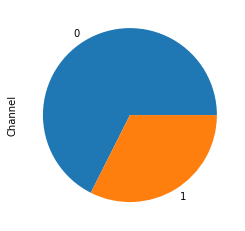

In [107]:
y_train.value_counts(normalize=True).plot(kind='pie')
plt.show()

RoundUpSampler for Model Improvement

In [147]:
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

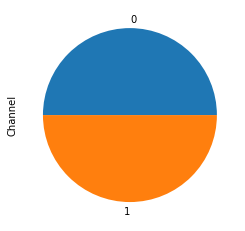

In [149]:
y_train_rus.value_counts(normalize=True).plot(kind='pie')
plt.show()

In [ ]:
Heatmap (Masih error)

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data_input/wholesale.csv')

In [165]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), center=0, cmap=’Blues’)
ax.set_title(‘Multi Collinearity of Wholesale Attributes’)

SyntaxError: invalid character in identifier (<ipython-input-165-2e1627fe7ff6>, line 2)

In [169]:
fig = plt.figure(figsize=(10,6))
ax = sns.heatmap(data.corr(), center=0, cmap=’Blues’)
ax.set_title(‘Multi Collinearity of Wholesale Attributes’)

SyntaxError: invalid character in identifier (<ipython-input-169-025ba5019bca>, line 3)

VI. Modelling (Logistic Regression) - Model Improvement

In [108]:
import statsmodels.api as sm

In [109]:
sm_logit = sm.Logit(y_train, sm.add_constant(X_train))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.224182
         Iterations 9


In [110]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                Channel   No. Observations:                  330
Model:                          Logit   Df Residuals:                      322
Method:                           MLE   Df Model:                            7
Date:                Mon, 05 Apr 2021   Pseudo R-squ.:                  0.6442
Time:                        16:07:19   Log-Likelihood:                -73.980
converged:                       True   LL-Null:                       -207.91
Covariance Type:            nonrobust   LLR p-value:                 4.359e-54
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -5.2636      1.035     -5.087      0.000      -7.292      -3.236
Region               0.5631      0.322      1.751      0.080      -0.067       1.193
Fresh             5.336e-06 

VII. KNN Model

Scalling Data

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [114]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
X_train_scaled[:5]

array([[1.        , 0.10268574, 0.11248247, 0.11710877, 0.00897569,
        0.12536743, 0.03072591],
       [1.        , 0.12067982, 0.07752195, 0.0542268 , 0.00192336,
        0.00602587, 0.06816854],
       [1.        , 0.04655455, 0.13925172, 0.0924906 , 0.04113034,
        0.08992259, 0.00490196],
       [0.        , 0.13970824, 0.09637665, 0.02590082, 0.00856471,
        0.01369293, 0.011869  ],
       [1.        , 0.03460606, 0.06910929, 0.01765524, 0.01377587,
        0.00965119, 0.1006675 ]])

In [120]:
X_train.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
48,3,11519,6152,10868,584,5121,1476
138,3,13537,4257,5034,155,249,3271
164,3,5224,7603,8584,2540,3674,238
248,1,15671,5279,2406,559,562,572
372,3,3884,3801,1641,876,397,4829


In [121]:
X_train.describe()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,2.542424,12334.290909,5828.966667,7847.600000,3079.863636,2857.830303,1587.018182
std,0.783388,13077.517858,6936.633633,9694.672413,5218.772776,4807.606279,3090.305100
min,1.000000,3.000000,55.000000,3.000000,38.000000,3.000000,3.000000
25%,2.000000,3072.000000,1699.250000,2129.750000,673.750000,273.500000,430.250000
50%,3.000000,8612.500000,3742.500000,4855.500000,1455.500000,835.500000,971.000000
75%,3.000000,17053.000000,7234.500000,10510.250000,3426.750000,3888.500000,1822.750000
max,3.000000,112151.000000,54259.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [129]:
knn_scaled = KNeighborsClassifier(n_neighbors=3, p=2)
knn_scaled.fit(X_train_scaled, y_train.values.ravel())
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [130]:
print('Accuracy score :', accuracy_score(y_test, y_pred_scaled))

Accuracy score : 0.8909090909090909


In [131]:
def make_conf_matrix(confusion):
    tn, fp, fn, tp = confusion.flatten()
    conf_df = pd.DataFrame({'p_0': [tn, fn, tn+fn], 'p_1': [fp, tp, fp+tp], 'total_actual': [tn+fp, fn+tp, tn+fn+tp+fp]},
                           index=['a_0', 'a_1', 'total_prediction'])
    return conf_df

In [132]:
make_conf_matrix(confusion_matrix(y_test, y_pred_scaled))

,p_0,p_1,total_actual
a_0,70,5,75
a_1,7,28,35
total_prediction,77,33,110


Choose Factor K

In [122]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn_i = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(X_train_scaled, y_train.values.ravel())
    
    y_pred_train = knn_i.predict(X_train_scaled)
    training_accuracies.append(accuracy_score(y_train, y_pred_train))
    
    y_pred_test = knn_i.predict(X_test_scaled)
    acc_score = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k = i

In [123]:
[testing_accuracies, training_accuracies]

[[0.8636363636363636,
  0.8909090909090909,
  0.9181818181818182,
  0.9090909090909091,
  0.9090909090909091,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.9,
  0.8636363636363636,
  0.8727272727272727,
  0.8727272727272727,
  0.8636363636363636],
 [1.0,
  0.9666666666666667,
  0.9272727272727272,
  0.9333333333333333,
  0.9242424242424242,
  0.9181818181818182,
  0.9090909090909091,
  0.9030303030303031,
  0.9090909090909091,
  0.9121212121212121,
  0.9,
  0.896969696969697,
  0.8848484848484849,
  0.8757575757575757,
  0.8666666666666667]]

/Users/amaliaputrieka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amaliaputrieka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/amaliaputrieka/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an erro

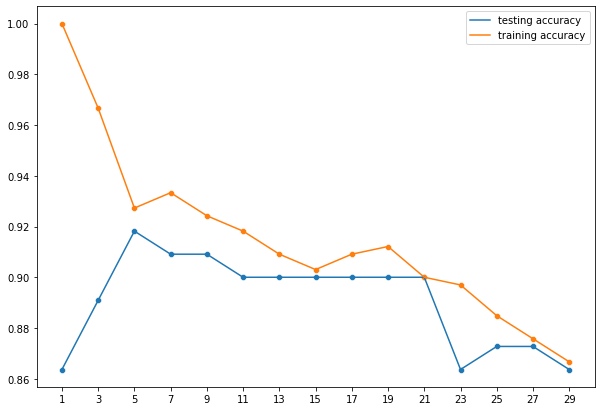

In [124]:
plt.figure(figsize=(10,7))
sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)
sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)
plt.legend(['testing accuracy', 'training accuracy'])
plt.xticks(list(k))
plt.show()

In [125]:
print('best k:', best_k)
print('accuracy:', score)

best k: 5
accuracy: 0.9181818181818182


The best factor k for this case is  with 91.81% accuracy. The performance improved again from 89.09% accuracy to 91.81% accuracy.

In [133]:
print(classification_report(y_test, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        75
           1       0.85      0.80      0.82        35

    accuracy                           0.89       110
   macro avg       0.88      0.87      0.87       110
weighted avg       0.89      0.89      0.89       110



VIII. Model Evaluation

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [135]:
# model benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()

In [136]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train, y_train, cv = skfold)
knn_cv = cross_val_score(knn, X_train, y_train, cv = skfold)

In [137]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)

CV Logreg: [0.86363636 0.90909091 0.89393939 0.87878788 0.90909091]
CV KNN: [0.89393939 0.92424242 0.93939394 0.86363636 0.86363636]


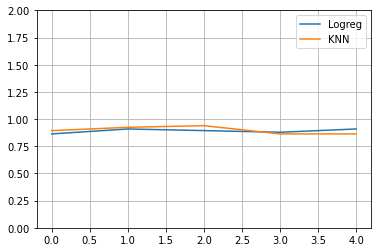

In [138]:
import matplotlib.pyplot as plt

plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.ylim(0,2)
plt.grid()
plt.legend()
plt.show()

In [139]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())

CV Logreg: 0.8909090909090909
CV KNN: 0.8969696969696971


In [140]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())

CV Logreg: 0.017669551196500894
CV KNN: 0.030903148567229


We would like to quantify the number of correct positive predictions made, thus we use 'precison' metrics to evaluate the models

In [157]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_pr = cross_val_score(logreg, X_train, y_train, cv = skfold, scoring='precision')
knn_cv_pr = cross_val_score(knn, X_train, y_train, cv = skfold, scoring='precision')

In [158]:
print('CV Logreg:', logreg_cv_pr)
print('CV KNN:', knn_cv_pr)

CV Logreg: [0.80952381 0.9        0.85       0.80952381 0.89473684]
CV KNN: [0.82608696 0.86956522 0.94736842 0.83333333 0.75      ]


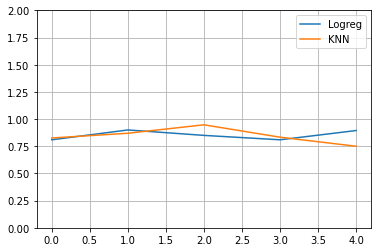

In [159]:
plt.plot(range(len(logreg_cv_pr)), logreg_cv_pr, label='Logreg')
plt.plot(range(len(knn_cv_pr)), knn_cv_pr, label='KNN')
plt.ylim(0,2)
plt.grid()
plt.legend()
plt.show()

IX. Conslusion

The KNN model gives slightly better performance from the observation than Logistic Regression (Logreg) model. Therefore, we would suggest the KNN model to help the retail management classify the 'Channel' of each product.